LINES ==> [array([  4.2 ,   3.4 , -12.12]), array([ 4.2   , -1.6   ,  2.6435])]
CIRC ==> [array([-1.    , -1.6   , -4.1276]), array([-1.    , -6.6   , 10.6359]), array([-5.2   , -5.    ,  7.9924])]
POINT ==> [0.49543333 2.9527    ]
2.24
0.7099999999999995
2.24


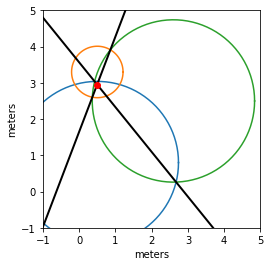

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

inp = np.load("06-03-2020_10-24-08.npy", allow_pickle=True)
lines = inp[0]
circ = inp[1]
point = inp[2]

print "LINES ==>", lines
print "CIRC ==>", circ
print "POINT ==>", point

fig, ax = plt.subplots()
plt.xlim(-1,1)
plt.ylim(2,4)
plt.xlim(-1,5)
plt.ylim(-1,5)
# plt.xlim(-2,6)
# plt.ylim(-2,6)
plt.xlabel("meters")
plt.ylabel("meters")
ax.set_aspect(1)

xrange = np.arange(-1,5,0.2)

for c in circ:
    theta = np.linspace(0, 2*np.pi, 100)

    r = np.sqrt((c[0]/2)**2+(c[1]/2)**2-c[2])
    print r

    x1 = -c[0]/2+r*np.cos(theta)
    x2 = -c[1]/2+r*np.sin(theta)
    
    ax.plot(x1, x2)
    
for line in lines:
    line_eqn = lambda x : -(line[0]/line[1])*x -line[2]/line[1]
    plt.plot(xrange, [ line_eqn(x) for x in xrange], color='k', linestyle='-', linewidth=2)
#     plt.plot([0,-line[2]/line[0]],[-line[2]/line[1],0])
    
plt.plot(point[0], point[1], marker='o', markersize=6, color="red")
plt.show()
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

inp = np.load("04-03-2020_18-23-14.npy", allow_pickle=True)
lines = inp[0]
circ = inp[1]
point = inp[2]

A = np.array([(lines[0])[0:2], (lines[1])[0:2]])
b = np.array([-(lines[0])[2],-(lines[1])[2]])

# A = np.array([[-1,-1], [1,-1]])
# b = np.array([-2,-2])

print np.subtract(circ[0], circ[1])
print np.subtract(circ[1], circ[2])
print np.subtract(circ[0], circ[2])

print A,b

try:
    point = np.linalg.solve(A,b)
except np.linalg.LinAlgError as err:
    print " MATRICE SINGOLARE PER %s, %s" % (dev[0].name, dev[0].addr)
    point = np.array([0,0])
    
print point

[  0.       5.     -16.3476]
[ 4.2    -1.6    48.0539]
[ 4.2     3.4    31.7063]
[[ 4.2  3.4]
 [ 4.2 -1.6]] [-31.7063 -48.0539]
[-10.19587333   3.26952   ]
